**Data Preprocessing**

Loading required packages

In [0]:
import pandas as pd
import xgboost as xgb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
 from sklearn.impute import KNNImputer

Reading data

In [0]:
test_data = pd.read_csv('Evaluation_dataset.csv')

train_data = pd.read_csv('Training_dataset_Original.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
train_data.shape

(80000, 49)

In [0]:
train_data.head

<bound method NDFrame.head of        application_key mvar1   mvar2   mvar3  ...  mvar45  mvar46 mvar47 default_ind
0               230032  1696  1.6541   0.000  ...      na       0      C           0
1               230033  1846  0.8095   0.000  ...      na      na      L           1
2               230034  1745  0.4001   0.000  ...      na       0      C           1
3               230035  1739  0.2193   0.000  ...       0       0      L           0
4               230036  1787  0.0118   0.225  ...      na      na      L           0
...                ...   ...     ...     ...  ...     ...     ...    ...         ...
79995           310027  1736  2.1740   0.000  ...      na       0      C           0
79996           310028  1724  0.0000   1.108  ...       0       0      C           0
79997           310029  1605  0.2901  11.561  ...      na       0      C           1
79998           310030  1780  1.1874   0.000  ...      na       0      L           0
79999           310031  1727  1.928

In [0]:
test_data.shape

(25000, 48)

**Treating missing values**

There are enormous number of missing values present in the data hence we can not delete those rows.
KNNimputer is used to fill the missing entries.

In [0]:
train_data.replace({"missing": np.nan, "na": np.nan,"C": 0.0,"L":1.0}, inplace=True)

In [0]:
test_data.replace({"missing": np.nan, "na": np.nan,"C": 0.0,"L":1.0}, inplace=True)

Predicting missing values

In [0]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")

In [0]:
imp_train=imputer.fit_transform(train_data)

In [0]:
imp_test=imputer.fit_transform(test_data)

In [0]:
df=pd.DataFrame(data=imp_train)

In [0]:
df1=pd.DataFrame(data=imp_test)

In [0]:
corr=df.corr()

[Text(0.5, 0, '0'),
 Text(2.5, 0, '2'),
 Text(4.5, 0, '4'),
 Text(6.5, 0, '6'),
 Text(8.5, 0, '8'),
 Text(10.5, 0, '10'),
 Text(12.5, 0, '12'),
 Text(14.5, 0, '14'),
 Text(16.5, 0, '16'),
 Text(18.5, 0, '18'),
 Text(20.5, 0, '20'),
 Text(22.5, 0, '22'),
 Text(24.5, 0, '24'),
 Text(26.5, 0, '26'),
 Text(28.5, 0, '28'),
 Text(30.5, 0, '30'),
 Text(32.5, 0, '32'),
 Text(34.5, 0, '34'),
 Text(36.5, 0, '36'),
 Text(38.5, 0, '38'),
 Text(40.5, 0, '40'),
 Text(42.5, 0, '42'),
 Text(44.5, 0, '44'),
 Text(46.5, 0, '46'),
 Text(48.5, 0, '48')]

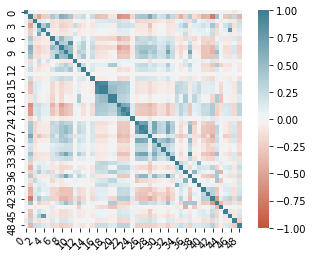

In [0]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

**Train-test splitting**

In [0]:
y_train_data=df[48]
x_train_data=df.drop([48],axis=1)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_data=scaler.fit_transform(x_train_data)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_data, y_train_data, test_size=0.25, random_state=0)

PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(.3)
pca.fit(x_train)


PCA(copy=True, iterated_power='auto', n_components=0.3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca.explained_variance_ratio_


array([0.20159267, 0.10472571])

In [0]:
pca.n_components_

2

In [0]:
train_pca = pca.transform(x_train)

In [0]:
test_pca = pca.transform(x_test)

In [0]:
principalDf = pd.DataFrame(data = train_pca)

In [0]:
principalDftest = pd.DataFrame(data = test_pca)

Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [0]:
logisticRegr.fit(principalDf, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
logisticRegr.score(principalDf, y_train)

0.78665

In [0]:
logisticRegr.score(principalDftest, y_test)

0.79155

In [0]:
predictions = logisticRegr.predict(imp_test)

ValueError: ignored

SVM

In [0]:
from sklearn import svm

In [0]:
clf = svm.SVC(kernel='rbf')

In [0]:
clf.fit(principalDf, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
clf.score(principalDftest, y_test)

0.79165

TSNE

In [0]:
from sklearn.manifold import TSNE

In [0]:
X_embedded = TSNE(n_components=2).fit_transform(principalDf)

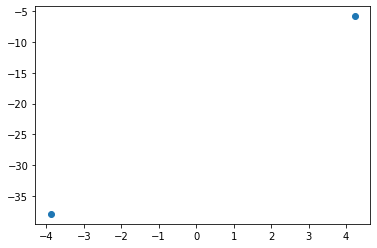

In [0]:
plt.scatter(X_embedded[0], X_embedded[1], cmap=plt.cm.rainbow)
plt.show()

Neural network

In [0]:
from keras.models import Sequential
from keras import layers

Using TensorFlow backend.


In [0]:
         input_dim = x_train_data.shape[1]  # Number of features
         model = Sequential()
         model.add(layers.Dense(1,input_dim=28,  activation='relu'))
         #model.add(layers.Dense(5, activation='sigmoid'))
         #model.add(layers.Dense(1, activation='softmax'))
            
         model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
        
         model.summary()

#Fitting data onto the model            
         history=model.fit(principalDf, y_train,epochs=10,batch_size=20)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 29        
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 3s 55us/step - loss: 5.8781 - accuracy: 0.5013
Epoch 2/10
60000/60000 [==============================] - 3s 50us/step - loss: 3.8695 - accuracy: 0.6474
Epoch 3/10
60000/60000 [==============================] - 3s 50us/step - loss: 3.4459 - accuracy: 0.6836
Epoch 4/10
60000/60000 [==============================] - 3s 51us/step - loss: 3.2287 - accuracy: 0.6936
Epoch 5/10
60000/60000 [==============================] - 3s 50us/step - loss: 2.8094 - accuracy: 0.7059
Epoch 6/10
60000/60000 [==============================] - 3s 52us/step - loss: 2.4746 - accuracy: 0.7115
Epoch 7/10
60000/60000

In [0]:
#Accuracy is calculated for training  data
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.7533


In [0]:
#Accuracy is calculated for test  data
loss, accuracy = model.evaluate(principalDftest, y_test, verbose=False)
print("Test Accuracy: {:.4f}".format(accuracy))

Test Accuracy: 0.7595


Decisiontree

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [0]:
tree = DecisionTreeClassifier()


In [0]:
tree.fit(principalDf, y_train)
prediction = tree.predict(principalDf)
print("Accuracy: {}%".format(round(accuracy_score(y_train, prediction) * 100,3)))

Accuracy: 88.322%


In [0]:
accuracy_score(y_test, prediction)

0.677

Random forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf = RandomForestRegressor(n_estimators = 25, random_state = 42)

In [0]:
rf.fit(principalDf, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [0]:
prediction_train = rf.predict(principalDf)

In [0]:
for i in range(len(prediction_train)):
  if (prediction_train[i]<=0.5):
      prediction_train[i]=0
  else:
      prediction_train[i]=1  

In [0]:
accuracy_score(y_train, prediction_train)

NameError: ignored

In [0]:
prediction = rf.predict(principalDftest)

In [0]:
for i in range(len(prediction)):
  if (prediction[i]<=0.5):
      prediction[i]=0
  else:
      prediction[i]=1    

In [0]:
accuracy_score(y_test, prediction)

0.7891

Gradient boosting machine

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=50, learning_rate = learning_rate, max_depth = 3, random_state = 0)
    gb.fit(principalDf, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(principalDf, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(principalDftest, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.795
Accuracy score (validation): 0.797

Learning rate:  0.1
Accuracy score (training): 0.801
Accuracy score (validation): 0.801

Learning rate:  0.25
Accuracy score (training): 0.805
Accuracy score (validation): 0.801

Learning rate:  0.5
Accuracy score (training): 0.812
Accuracy score (validation): 0.797

Learning rate:  0.75
Accuracy score (training): 0.813
Accuracy score (validation): 0.797

Learning rate:  1
Accuracy score (training): 0.815
Accuracy score (validation): 0.796



In [0]:
pred=gb.predict(imp_test)

In [0]:
y_pred=gb.predict(x_train)

In [0]:
out= pd.DataFrame()

In [0]:
out['id']=df1[0]
out['def_ind'] =pred
out.to_csv('output.csv')


',id,def_ind\n0,570075.0,1.0\n1,570076.0,1.0\n2,570077.0,1.0\n3,570078.0,1.0\n4,570079.0,1.0\n5,570080.0,1.0\n6,570081.0,1.0\n7,570082.0,1.0\n8,570083.0,1.0\n9,570084.0,1.0\n10,570085.0,1.0\n11,570086.0,1.0\n12,570087.0,1.0\n13,570088.0,1.0\n14,570089.0,1.0\n15,570090.0,1.0\n16,570091.0,1.0\n17,570092.0,1.0\n18,570093.0,1.0\n19,570094.0,1.0\n20,570095.0,1.0\n21,570096.0,1.0\n22,570097.0,1.0\n23,570098.0,1.0\n24,570099.0,1.0\n25,570100.0,1.0\n26,570101.0,1.0\n27,570102.0,1.0\n28,570103.0,1.0\n29,570104.0,0.0\n30,570105.0,1.0\n31,570106.0,1.0\n32,570107.0,0.0\n33,570108.0,1.0\n34,570109.0,1.0\n35,570110.0,1.0\n36,570111.0,1.0\n37,570112.0,1.0\n38,570113.0,1.0\n39,570114.0,1.0\n40,570115.0,1.0\n41,570116.0,1.0\n42,570117.0,1.0\n43,570118.0,1.0\n44,570119.0,1.0\n45,570120.0,1.0\n46,570121.0,1.0\n47,570122.0,1.0\n48,570123.0,1.0\n49,570124.0,1.0\n50,570125.0,1.0\n51,570126.0,1.0\n52,570127.0,1.0\n53,570128.0,1.0\n54,570129.0,1.0\n55,570130.0,1.0\n56,570131.0,1.0\n57,570132.0,1.0\n58,570133.

**xgboost**

In [0]:
D_train = xgb.DMatrix(principalDf, label=y_train)
D_test = xgb.DMatrix(principalDftest, label=y_test)


In [0]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 2} 

steps = 20

In [0]:
model = xgb.train(param, D_train, steps)

In [0]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

#print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
#print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Accuracy = 0.79965


Trial : thought of experimenting some other methods too

Kmeans clustering

```
# This is formatted as code
```



In [0]:
from sklearn.cluster import KMeans

In [0]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x_train_data)
    distortions.append(km.inertia_)



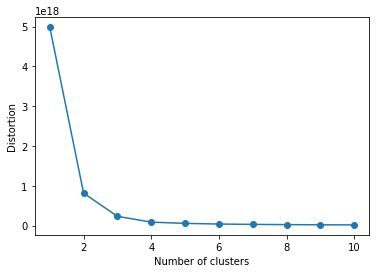

In [0]:
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [0]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km.fit(imp_train)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

**Summary**

1.Loaded the data
2.Found missing values
3.Imputed the missing values using knn(3)-took around 30 minutes
4.Train-test split

PCA was implemented to reduce dimensionality of feautres.

Modelling

1.Implemented logistic regression-one of the best algorithms for classification
2.Implemented decision tree which gave great accuracy on training data but less accuracy on test data
3.Random forest performed better than DT (obvious)
4.**Gradient boosting machine gave consistent and the best accuracy (81)on training and 80 on test data of all the algorithms implemented**.
5.Expected high accuracy on neural network but it was only 75



  


